# 预测糖尿病模型

作者:王媛媛 王丽

这是一个二分类预测问题，整体流程是：数据处理——建立预测模型——模型评估和验证——选择最优模型

## 一.导入所需要模块

In [1]:
import numpy as np    
import pandas as pd
import seaborn as sns 
from pandas import set_option
import matplotlib.pyplot as plt    
plt.style.use('fivethirtyeight')    # 设置绘图风格
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 28, 18
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']     #用来正常显示中文标签
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.model_selection import KFold    #交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix    #导入混淆矩阵

## 二.数据处理

### 1.读取数据

In [2]:
diabetes = pd.read_csv('D:\data_set\diabetes.csv')     #导入数据，读取CSV数据
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


可以看出该数据包括8个属性变量，一个标签变量，数据标签含义如下：

【1】Pregnancies：怀孕次数

【2】Glucose：葡萄糖

【3】BloodPressure：血压 (mm Hg)

【4】SkinThickness：皮层厚度 (mm)

【5】Insulin：胰岛素 2小时血清胰岛素（mu U / ml

【6】BMI：体重指数 （体重/身高）^2

【7】DiabetesPedigreeFunction：糖尿病谱系功能

【8】Age：年龄 （岁）

【9】Outcome：类标变量 （0或1）

In [3]:
diabetes.info()    # 查看数据集的有关信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
set_option('precision',2)    ##描述性统计信息,保留两位小数
diabetes.describe()
#由描述性统计的结果可知，有些属性的最小值为0，考虑到实际情况，这属于缺失值

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


### 2.处理缺失值

In [5]:
'''观察描述性信息的min，考虑到实际情况，可以猜测某些最小值为0的属性是缺失值。因此将缺失值替换为均值。
由于患病和不患病的属性值之间存在差异，于是用按标签分类后再计算均值'''
diabetes0 = diabetes[diabetes['Outcome'] < 1]
diabetes1 =diabetes[diabetes['Outcome'] > 0]
for attribute in diabetes0.columns[1:6]:
    for i in diabetes0.index:
        if diabetes0[attribute][i] == 0:
            diabetes0[attribute][i] = np.mean(diabetes0[attribute])
for attribute in diabetes1.columns[1:6]:
    for i in diabetes1.index:
        if diabetes1[attribute][i] == 0:
            diabetes1[attribute][i] = np.mean(diabetes1[attribute])
            
diabetes = pd.merge(diabetes0,diabetes1,how = 'outer')

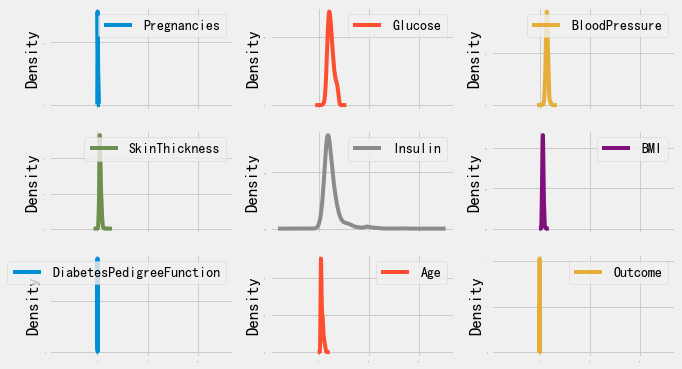

In [6]:
'''查看此时的分布图'''
diabetes.plot(kind='density',subplots=True,layout=(3,3),fontsize=1,figsize=(10,6))
plt.show()

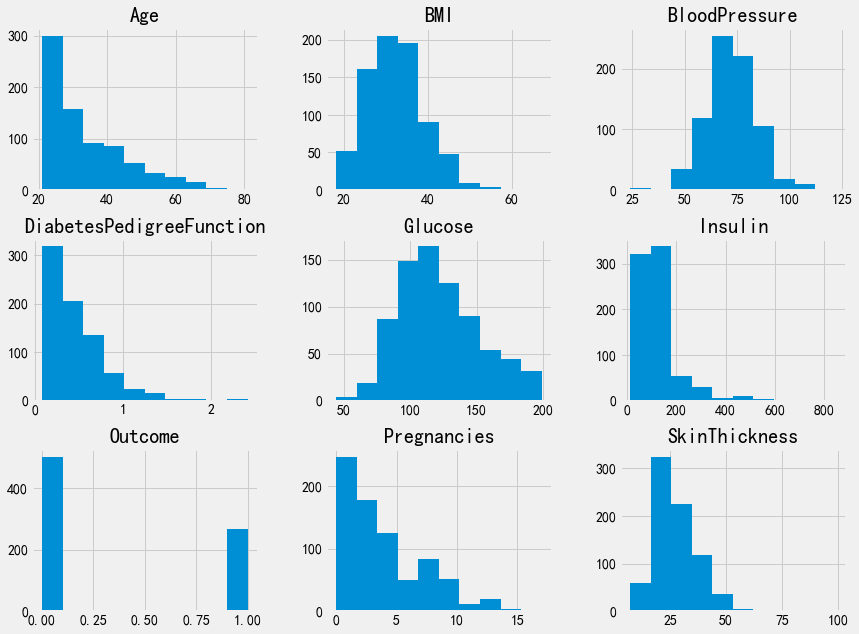

In [7]:
diabetes.hist(figsize=(13,10))    #绘制直方图，大致看出数据分类的平衡程度
plt.show()

Pregnancies                     AxesSubplot(0.08,0.641765;0.255882x0.238235)
Glucose                     AxesSubplot(0.387059,0.641765;0.255882x0.238235)
BloodPressure               AxesSubplot(0.694118,0.641765;0.255882x0.238235)
SkinThickness                   AxesSubplot(0.08,0.355882;0.255882x0.238235)
Insulin                     AxesSubplot(0.387059,0.355882;0.255882x0.238235)
BMI                         AxesSubplot(0.694118,0.355882;0.255882x0.238235)
DiabetesPedigreeFunction            AxesSubplot(0.08,0.07;0.255882x0.238235)
Age                             AxesSubplot(0.387059,0.07;0.255882x0.238235)
Outcome                         AxesSubplot(0.694118,0.07;0.255882x0.238235)
dtype: object

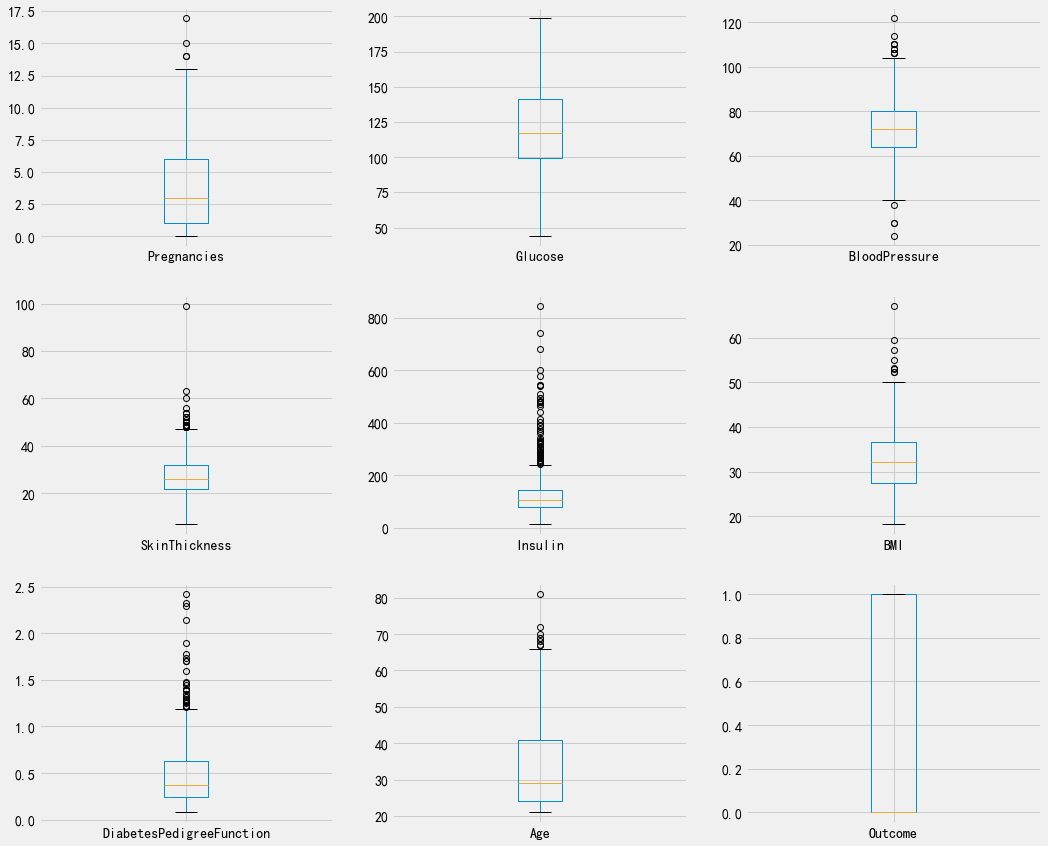

In [8]:
diabetes.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False, figsize=(16,14))

### 3.处理异常值

In [9]:
'''由箱线图猜测部分属性有异常值'''
for attribute in diabetes.columns[1:7]:
    first_quartile = diabetes[attribute].describe()['25%']
    third_quartile = diabetes[attribute].describe()['75%']
    iqr = third_quartile - first_quartile

    diabetes = diabetes[(diabetes[attribute] > (first_quartile - 3 * iqr)) &(diabetes[attribute] < (third_quartile + 3 * iqr))]
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,737.00,737.00,737.00,737.00,737.00,737.00,737.00,737.00,737.00
mean,3.89,119.99,72.35,27.09,117.54,32.21,0.46,33.22,0.34
std,3.38,29.55,12.02,8.71,56.74,6.67,0.30,11.73,0.47
min,0.00,44.00,24.00,7.00,15.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,21.00,80.00,27.40,0.24,24.00,0.00
50%,3.00,115.00,72.00,25.00,104.00,32.00,0.37,29.00,0.00
75%,6.00,138.00,80.00,32.00,140.00,36.30,0.61,41.00,1.00
max,17.00,199.00,122.00,60.00,342.00,57.30,1.73,81.00,1.00


## 二.建立模型

In [10]:
'''划分数据集'''
x = diabetes.iloc[:,:8]
y = diabetes.iloc[:,-1:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 1)   

In [11]:
'''交叉验证,大概看一下几种模型的预测效果'''
num_fold = 10    #表示划分为几块
seed = 7    #固定随机起点
scoring = 'accuracy'    #使用准确率为结果的度量指标

#评估算法——原始数据
models = {}
models['LR'] = LogisticRegression()
models['KNN'] = KNeighborsClassifier()
models['Tree'] = DecisionTreeClassifier()
models['NB']  = GaussianNB()
models['SVM'] = SVC()

results = []
for key in models:
    kfold = KFold(n_splits=num_fold,random_state=seed)    #交叉验证
    cv_results = cross_val_score(models[key],x_train,y_train)    # 该函数用交叉检验(cross-validation)来估计一个模型的得分
    results.append(cv_results)
    print(f'{key,cv_results.mean()}算法{cv_results.mean():.2%},标准方差：{cv_results.std():2f}')

('LR', 0.7669902912621359)算法76.70%,标准方差：0.032492
('KNN', 0.8407766990291261)算法84.08%,标准方差：0.025018
('Tree', 0.7941747572815534)算法79.42%,标准方差：0.026339
('NB', 0.7689320388349514)算法76.89%,标准方差：0.033856
('SVM', 0.7941747572815534)算法79.42%,标准方差：0.031550


In [12]:
'''混淆矩阵'''
def function(model,x_train,x_test,y_train,y_test):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 1)
    clf = model
    clf = clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    mat = confusion_matrix(y_test, y_pred)    #混淆矩阵
    score = model.score(x_train,y_train)
    print(mat)
    print(f'训练得分为：{score}')
    plt.figure(figsize=(6, 4))
    sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()

[[133  14]
 [ 31  44]]
训练得分为：0.7883495145631068


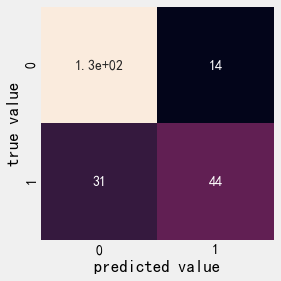

[[131  16]
 [ 26  49]]
训练得分为：0.8815533980582524


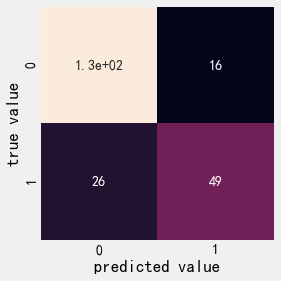

[[130  17]
 [ 24  51]]
训练得分为：1.0


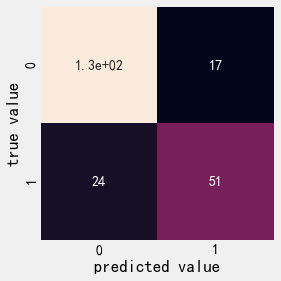

[[127  20]
 [ 27  48]]
训练得分为：0.7786407766990291


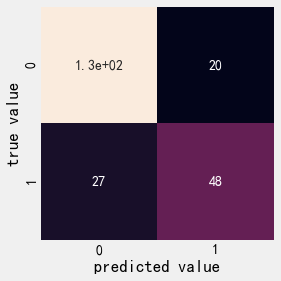

[[136  11]
 [ 30  45]]
训练得分为：0.8058252427184466


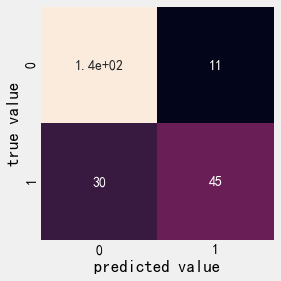

In [13]:
for i in models.keys():
    function(models[i],x_train,x_test,y_train,y_test)

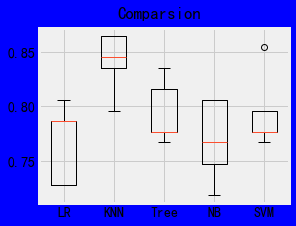

In [14]:
#评估算法——箱线图
fig =plt.figure(figsize=(4, 3), facecolor='blue')
fig.suptitle('Comparsion')    #绘制总标题
ax = fig.add_subplot(111)    #将画布分割成1行1列第一个
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [15]:
#评估算法——正态化
from sklearn.pipeline import Pipeline #自动化处理 
from sklearn.preprocessing import StandardScaler #标准化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])
pipelines['ScalerKNN'] = Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])
pipelines['ScalerTree'] = Pipeline([('Scaler',StandardScaler()),('Tree',DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])

In [23]:
results = []
for key in pipelines:
    kfold = KFold(n_splits=num_fold,random_state=seed)
    cv_results = cross_val_score(pipelines[key],x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    print(f'{key}算法准确率{cv_results.mean():.2f},标准方差:{cv_results.std():.2f}')

ScalerLR算法准确率0.79,标准方差:0.06
ScalerKNN算法准确率0.80,标准方差:0.06
ScalerTree算法准确率0.80,标准方差:0.06
ScalerNB算法准确率0.78,标准方差:0.04
ScalerSVM算法准确率0.82,标准方差:0.07


## 三.优化参数

In [24]:
''' 随机森林, 通过调整参数来获取更好的结果'''
import timeit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameter_space = {'max_features':[2,10,'auto'],'n_estimators':[100,200],'criterion':['gini','entropy'],'min_samples_leaf':[2,4,6]}
start=timeit.default_timer()     #计算程序运行时间，求得开始时间
clf = RandomForestClassifier(random_state = 14)
grid = GridSearchCV(clf,parameter_space)
grid.fit(x_train, y_train)
print(f"Accuracy:{grid.best_score_*100:.1f}")
print(grid.best_estimator_)    #打印出最好的模型参数
end=timeit.default_timer()
timetest_rf=end-start
print(f'程序运行时间: {timetest_rf} Seconds')

Accuracy:84.3
RandomForestClassifier(max_features=2, min_samples_leaf=6, random_state=14)
程序运行时间: 24.68178900000001 Seconds


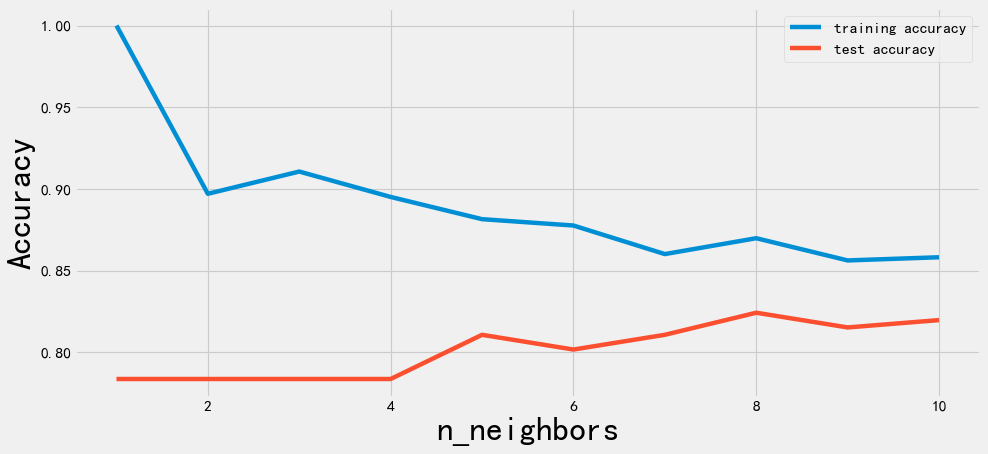

In [25]:
'''KNN调整参数'''
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,11)    #尝试k=1到11
start=timeit.default_timer()    #计算程序运行时间，求得开始时间
for n_neighbors in neighbors_settings:

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))

    test_accuracy.append(knn.score(x_test,y_test))
plt.figure(figsize=(13,6),dpi=80)
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy",size=30)
plt.xlabel("n_neighbors",size=30)
plt.legend()
plt.savefig('knn_compare_model')

In [26]:
#可以看出来k=4时，测试准确性最高，所以选k=4
start=timeit.default_timer()
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train) 
print(f'Accuracy of K-NN classifier on training set:{knn.score(x_train,y_train):.2f}')
print(f'Accuracy of K-NN classifier on test set:{knn.score(x_test,y_test):.2f}')
end=timeit.default_timer()
timetest_rf=end-start
print(f'程序运行时间: {timetest_rf} Seconds')

Accuracy of K-NN classifier on training set:0.90
Accuracy of K-NN classifier on test set:0.78
程序运行时间: 0.024365999999986343 Seconds


In [ ]:
'''支持向量机调参（C惩罚系数，Kernel内核函数）'''
scaler = StandardScaler().fit(x_train)
rescalerX = scaler.transform(x_train).astype(float)
param_grid = {}
param_grid['C'] = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1.3,1.5,1.7,2.0]
param_grid['kernel'] = ['linear','poly','rbf','sigmoid']
model = SVC()
kfold = KFold(n_splits=num_fold,random_state=seed)
grid_result = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=KFold)
grid_result = GridSearchCV(model, param_grid)
grid_result.fit(x_train, y_train)

kfold = KFold(n_splits=num_fold,random_state=seed)
print('最好模型准确率为:{grid_result.best_score_:.2%},参数是:{grid_result.best_params_}')
cv_results = zip(grid_result.cv_results_['mean_test_score'],
grid_result.cv_results_['std_test_score'],
grid_result.cv_results_['params'])

for mean,std,param in cv_results:
    print(f'算法准确率：{mean:.2%},标准方差：{std:.2f}，参数{param}')